# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Project Purpose:
*Determine the more profitable prepaid plan for Megaline: The primary goal is to analyze client data to understand which plan (Surf or Ultimate) generates higher revenue for the telecom operator.

*Inform advertising budget allocation: The findings will guide the commercial department in allocating advertising budgets more effectively, potentially focusing marketing efforts on the more profitable plan.

In [ ]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

In [2]:
# Load the data files into different DataFrames

users = pd.read_csv('/datasets/megaline_users.csv', parse_dates=['reg_date'])
calls = pd.read_csv('/datasets/megaline_calls.csv', parse_dates=['call_date'])
messages = pd.read_csv('/datasets/megaline_messages.csv', parse_dates=['message_date'])
internet = pd.read_csv('/datasets/megaline_internet.csv', parse_dates=['session_date'])
plans = pd.read_csv('/datasets/megaline_plans.csv')

# Creating a function for initial exploration 

def data_exploration(df):
  """
  This function explores a given DataFrame.

  Args:
    df: The pandas DataFrame to explore.

  Returns:
    None
  """

  print(f"Shape of the DataFrame: {df.shape}")
  print("\nFirst few rows:")
  print(df.head())
  print("\nColumn names:")
  print(df.columns)
  print("\nData types:")
  print(df.dtypes)
  print("\nSummary statistics:")
  print(df.describe())
  print("\nMissing values:")
  print(df.isnull().sum())
  print("\nDuplicate rows:")
  print(f"Number of duplicate rows: {df.duplicated().sum()}")
  print("\nUnique values in each column:")
  for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
data_exploration(plans)

Shape of the DataFrame: (2, 8)

First few rows:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Column names:
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

Data types:
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

Summary statistics:
       m

In [4]:
# Print a sample of data for plans
plans.sample(n=2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Based on the provided information, the data for plans file appears to accurately reflect the described plan details:

Surf Plan:

Monthly charge: 20 dollars 
500 minutes, 50 texts, 15 GB data (15360 MB)
Overage charges: add 0.03 cents per minute, add 0.03 cents per text, add 10 dollars per GB

Ultimate Plan:

Monthly charge: 70 dollars
3000 minutes, 1000 texts, 30 GB data (30720 MB)
Overage charges: add 0.01 cents per minute, add 0.01 cents per text, add 7 dollars per GB

No issues with data types, missing values, or inconsistencies are apparent in the provided sample.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
data_exploration(users)

Shape of the DataFrame: (500, 8)

First few rows:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate        NaN  
1 2018-08-13      surf        NaN  
2 2018-10-21      surf        NaN  
3 2018-01-28      surf        NaN  
4 2018-05-23      surf        NaN  

Column names:
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

Data types:
user_id                int64
first_name            object
last_name             object
age           

In [6]:
# Print a sample of data for users
users.sample(n=10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
51,1051,Rosario,Gibbs,55,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-12-11,surf,NaN
137,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,NaN
455,1455,Jude,Fischer,20,"Denver-Aurora-Lakewood, CO MSA",2018-08-13,surf,NaN
204,1204,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN
298,1298,Loyce,Cooley,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-09-21,surf,2018-12-19
107,1107,Lane,Cash,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-15,ultimate,NaN
103,1103,Moises,Weeks,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-07-01,surf,NaN
380,1380,Lajuana,Kelley,35,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-09-04,ultimate,NaN
371,1371,Roderick,Slater,27,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-10-27,surf,NaN
256,1256,Johnny,Wise,53,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-11,surf,NaN


The users data matches the description provided for the project. 
Appropriate data types are used for each column.
No missing values are present (except for churn_date for active users, which is expected).

## Calls

In [7]:
# Print the general/summary information about the calls' DataFrame
data_exploration(calls)

Shape of the DataFrame: (137735, 4)

First few rows:
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22

Column names:
Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

Data types:
id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

Summary statistics:
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000

Missing values:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Duplicate rows:
Number of duplicate row

In [8]:
# Print a sample of data for calls
calls.sample(n=10)

,id,user_id,call_date,duration
132384,1476_335,1476,2018-11-11,7.20
44614,1160_630,1160,2018-10-10,0.00
136333,1494_175,1494,2018-12-21,3.02
74951,1264_269,1264,2018-05-15,3.14
54271,1196_152,1196,2018-06-04,0.00
58104,1209_686,1209,2018-09-07,10.86
94073,1335_303,1335,2018-11-22,8.80
41938,1153_851,1153,2018-11-13,14.44
103240,1365_436,1365,2018-10-07,14.16
64928,1236_200,1236,2018-04-27,7.43


### Fix data

In [9]:
# new column for rounded-up duration
calls['duration_rounded_up'] = np.ceil(calls['duration']).astype(int)
# checking the results
calls.sample(n=10)

,id,user_id,call_date,duration,duration_rounded_up
27434,1103_224,1103,2018-10-09,3.13,4
23149,1084_196,1084,2018-12-11,6.45,7
121262,1426_50,1426,2018-12-08,4.36,5
13745,1058_333,1058,2018-12-19,0.00,0
87241,1320_910,1320,2018-08-24,0.00,0
6829,1031_721,1031,2018-11-26,10.63,11
83626,1305_34,1305,2018-08-20,5.04,6
106730,1377_282,1377,2018-09-25,1.81,2
35457,1132_955,1132,2018-09-18,14.13,15
123936,1437_892,1437,2018-12-18,0.00,0


The calls data appears to be in good shape.

Matches Project Description: The data accurately reflects call records, including id, call_date, duration, and user_id, as described in the project instructions.

Data Quality:

No apparent issues with missing values or inconsistencies.
Data types seem appropriate.
Enhancement: Addressed the need to account for Megaline's billing policy by creating a new column, duration_rounded_up, which rounds call durations up to the nearest minute. This ensures accurate calculations for call charges.

## Messages

In [10]:
# Print the general/summary information about the messages' DataFrame
data_exploration(messages)

Shape of the DataFrame: (76051, 3)

First few rows:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

Column names:
Index(['id', 'user_id', 'message_date'], dtype='object')

Data types:
id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

Summary statistics:
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000

Missing values:
id              0
user_id         0
message_date    0
dtype: int64

Duplicate rows:
Number of duplicate rows: 0

Unique values in each column:
id: 76051 unique values
user_id: 402 unique values
message_date: 351 unique values


In [11]:
# Print a sample of data for messages
messages.sample(n=10)

,id,user_id,message_date
47799,1324_519,1324,2018-12-22
51181,1331_356,1331,2018-09-04
40537,1261_184,1261,2018-08-09
33387,1211_63,1211,2018-10-20
1575,1016_30,1016,2018-11-27
73381,1470_1009,1470,2018-08-17
19983,1127_39,1127,2018-12-11
25949,1155_343,1155,2018-08-22
46685,1318_59,1318,2018-12-29
46383,1316_234,1316,2018-06-11


The messages data matches the provided description data. No apparent issues with missing values or inconsistencies.

## Internet

In [12]:
# Print the general/summary information about the internet DataFrame
data_exploration(internet)

Shape of the DataFrame: (104825, 4)

First few rows:
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

Column names:
Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

Data types:
id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

Summary statistics:
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000

Missing values:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Duplica

In [13]:
# Print a sample of data for the internet traffic
internet.sample(n=10)

,id,user_id,session_date,mb_used
66876,1312_99,1312,2018-05-25,166.47
84103,1392_71,1392,2018-11-23,147.99
4928,1028_501,1028,2018-04-05,147.44
42720,1189_290,1189,2018-12-16,470.16
82520,1385_271,1385,2018-08-26,605.95
54811,1248_27,1248,2018-11-29,0.00
57794,1261_253,1261,2018-04-26,630.33
14981,1068_97,1068,2018-11-28,120.30
83419,1389_341,1389,2018-09-15,516.21
93666,1437_115,1437,2018-11-17,442.54


### Fix data

In [14]:
# Creating a new column for gigabytes, and rounding it up
internet['gb_used'] = internet['mb_used'] / 1024
# Checking the results
internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


## Study plan conditions

In [15]:
# Print out the plan conditions and make sure they are clear for you
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

In [16]:
# Calculate the number of calls made by each user per month. Save the result.
# Merge users and calls DataFrames on 'user_id'
merged_calls = pd.merge(users, calls, on='user_id')

# Create a new column 'month' to group by
merged_calls['month'] = merged_calls['call_date'].dt.month

# Calculate the number of calls made by each user per month
calls_per_month_per_user = merged_calls.groupby(['user_id', 'month'])['id'].count().reset_index()

# Rename the 'id' column to 'call_count'
calls_per_month_per_user.rename(columns={'id': 'call_count'}, inplace=True)

# Checking the results
calls_per_month_per_user.sample(n=10)

,user_id,month,call_count
2166,1477,12,49
328,1071,8,74
397,1082,12,96
1961,1427,11,42
1514,1335,8,63
704,1153,7,79
1824,1400,5,69
498,1107,11,14
475,1101,8,54
803,1171,11,37


In [17]:
# Calculate the amount of minutes spent by each user per month. Save the result.
min_spent_by_user = merged_calls.groupby(['user_id', 'month'])['duration_rounded_up'].sum().reset_index()

# Rename the 'duration_rounded_up' column for clarity
min_spent_by_user.rename(columns={'duration_rounded_up': 'total_minutes'}, inplace=True)

# Checking the results
min_spent_by_user.sample(n=10)


,user_id,month,total_minutes
1671,1366,9,608
1971,1432,10,655
2131,1470,7,524
491,1106,6,506
1203,1259,9,147
1661,1364,11,413
193,1048,11,259
346,1073,11,316
368,1077,9,856
777,1166,10,179


In [18]:
# Calculate the number of messages sent by each user per month. Save the result.
# Merge users and messages DataFrames on 'user_id'
merged_messages = pd.merge(users, messages, on='user_id')

# Extract month from 'message_date'
merged_messages['month'] = merged_messages['message_date'].dt.month

# Calculate the number of messages sent by each user per month
messages_per_month_per_user = merged_messages.groupby(['user_id', 'month'])['id'].count().reset_index()

# Rename the 'id' column to 'message_count'
messages_per_month_per_user.rename(columns={'id': 'message_count'}, inplace=True)

# Checking the results
messages_per_month_per_user.sample(n=10)

,user_id,month,message_count
1792,1492,11,31
623,1167,11,41
1407,1377,8,6
1541,1417,8,12
1788,1491,11,46
802,1214,2,15
598,1162,11,34
1485,1399,10,23
549,1145,12,61
627,1170,9,3


In [19]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
# Merge users and internet DataFrames on 'user_id'
merged_internet = pd.merge(users, internet, on='user_id')

# Extract month from 'session_date'
merged_internet['month'] = merged_internet['session_date'].dt.month

# Calculate GB used per month per user
internet_gb_per_month_per_user = merged_internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()

# Round up GB used per month
internet_gb_per_month_per_user['gb_used'] = np.ceil(internet_gb_per_month_per_user['gb_used'])

# Checking the results
internet_gb_per_month_per_user.sample(n=10)


,user_id,month,gb_used
512,1109,9,12.0
1652,1359,2,20.0
1228,1259,7,3.0
2106,1458,10,18.0
1162,1247,12,26.0
1969,1421,11,17.0
1874,1403,7,18.0
1142,1244,12,20.0
1038,1217,10,21.0
1023,1214,6,21.0


Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [20]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# Group and aggregate data
calls_grouped = merged_calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
messages_grouped = merged_messages.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns={'id': 'messages_count'}).reset_index()
internet_grouped = merged_internet.groupby(['user_id', 'month']).agg({'gb_used': 'sum'}).reset_index()
internet_grouped['gb_used'] = np.ceil(internet_grouped['gb_used']).astype(int) # Round up and convert to int

# Merge dataframes
merged_df = pd.merge(calls_grouped, messages_grouped, on=['user_id', 'month'], how='outer')
merged_df = pd.merge(merged_df, internet_grouped, on=['user_id', 'month'], how='outer')

# Fill missing values with 0 
merged_df['duration'].fillna(0, inplace=True)
merged_df['messages_count'].fillna(0, inplace=True)
merged_df['gb_used'].fillna(0, inplace=True)

# Convert to integers 
merged_df['duration'] = merged_df['duration'].astype(int)
merged_df['messages_count'] = merged_df['messages_count'].astype(int)
merged_df['gb_used'] = merged_df['gb_used'].astype(int)

# Print the merged DataFrame
merged_df.sample(n=10)

,user_id,month,duration,messages_count,gb_used
1451,1323,12,27,1,2
1634,1360,12,775,0,24
417,1088,10,179,53,12
422,1090,7,279,24,27
253,1059,5,817,76,12
534,1114,10,687,89,16
962,1206,9,400,35,27
944,1201,12,354,10,27
1704,1374,5,369,67,30
1442,1321,9,448,0,19


In [21]:
# Add the plan information
# Merge with users user_id, city and plan information
merged_df = pd.merge(merged_df, users[['user_id', 'plan', 'city']], on='user_id', how='left')
merged_df = pd.merge(merged_df, plans, left_on='plan', right_on='plan_name', how='left')
merged_df.head()

,user_id,month,duration,messages_count,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,116,11,2,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,171,30,7,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,9,297,44,14,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,10,374,53,22,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,11,404,36,19,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf


In [22]:
# Calculate the monthly revenue for each user
# Calculate overage minutes, messages, and data
merged_df['overage_minutes'] = merged_df['duration'] - merged_df['minutes_included']
merged_df['overage_minutes'] = merged_df['overage_minutes'].clip(lower=0)  # Ensure non-negative values
merged_df['overage_messages'] = merged_df['messages_count'] - merged_df['messages_included']
merged_df['overage_messages'] = merged_df['overage_messages'].clip(lower=0)
merged_df['overage_gb'] = np.ceil(merged_df['gb_used']) - (merged_df['mb_per_month_included'] / 1024) # Convert to GB
merged_df['overage_gb'] = merged_df['overage_gb'].clip(lower=0)

# Round up overage GB to the nearest whole number
merged_df['overage_gb'] = np.ceil(merged_df['overage_gb']) 

# Calculate overage charges
merged_df['overage_minutes_charge'] = merged_df['overage_minutes'] * merged_df['usd_per_minute']
merged_df['overage_messages_charge'] = merged_df['overage_messages'] * merged_df['usd_per_message']
merged_df['overage_gb_charge'] = merged_df['overage_gb'] * merged_df['usd_per_gb']

# Calculate total revenue
merged_df['total_revenue'] = merged_df['usd_monthly_pay'] + \
                            merged_df['overage_minutes_charge'] + \
                            merged_df['overage_messages_charge'] + \
                            merged_df['overage_gb_charge']

# Print the final DataFrame
merged_df

,user_id,month,duration,messages_count,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,plan_name,overage_minutes,overage_messages,overage_gb,overage_minutes_charge,overage_messages_charge,overage_gb_charge,total_revenue
0,1000,12,116,11,2,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,...,0.01,0.01,ultimate,0,0,0.0,0.0,0.00,0.0,70.00
1,1001,8,171,30,7,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,...,0.03,0.03,surf,0,0,0.0,0.0,0.00,0.0,20.00
2,1001,9,297,44,14,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,...,0.03,0.03,surf,0,0,0.0,0.0,0.00,0.0,20.00
3,1001,10,374,53,22,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,...,0.03,0.03,surf,0,3,7.0,0.0,0.09,70.0,90.09
4,1001,11,404,36,19,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,...,0.03,0.03,surf,0,0,4.0,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0,61,13,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,...,0.03,0.03,surf,0,11,0.0,0.0,0.33,0.0,20.33
2289,1361,5,0,2,2,surf,"Birmingham-Hoover, AL MSA",50,15360,500,...,0.03,0.03,surf,0,0,0.0,0.0,0.00,0.0,20.00
2290,1482,10,0,2,0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,30720,3000,...,0.01,0.01,ultimate,0,0,0.0,0.0,0.00,0.0,70.00
2291,1108,12,0,0,1,ultimate,"Salt Lake City, UT MSA",1000,30720,3000,...,0.01,0.01,ultimate,0,0,0.0,0.0,0.00,0.0,70.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

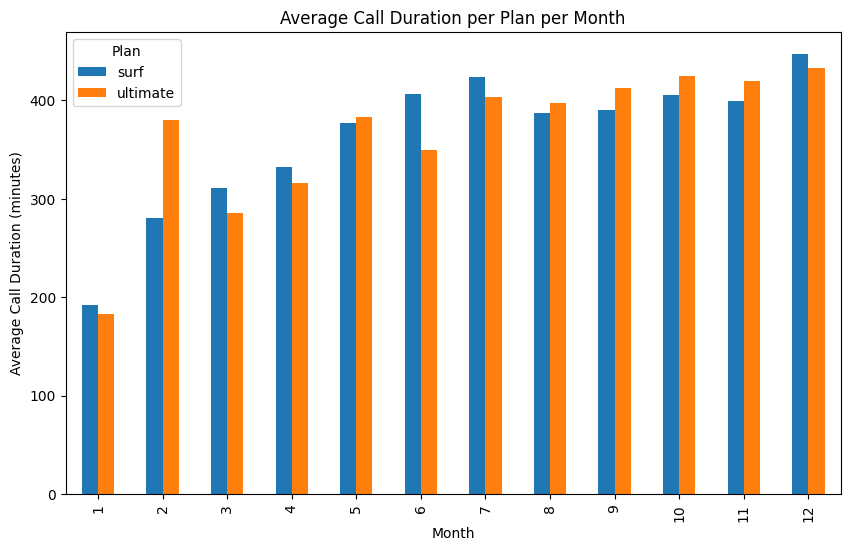

In [23]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# Calculate average call duration per plan per month
avg_call_duration = merged_df.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Create a pivot table for better visualization
avg_call_duration_pivot = avg_call_duration.pivot(index='month', columns='plan', values='duration')

# Create a bar plot
avg_call_duration_pivot.plot(kind='bar', figsize=(10, 6))

# Set plot labels
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Plan per Month')
plt.legend(title='Plan')

# Show the plot
plt.show()


Other than the month of February, the average call duration between both plans is almost similar

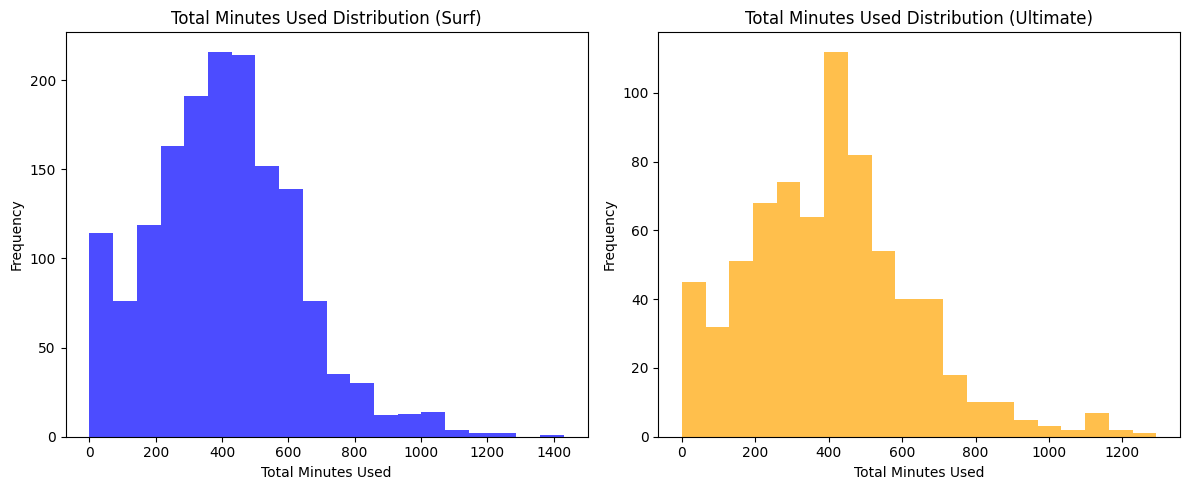

In [24]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Calculate total minutes used per user per month
total_minutes_used = merged_df.groupby(['user_id', 'month', 'plan'])['duration'].sum().reset_index()

# Create separate DataFrames for each plan
surf_minutes = total_minutes_used[total_minutes_used['plan'] == 'surf']['duration']
ultimate_minutes = total_minutes_used[total_minutes_used['plan'] == 'ultimate']['duration']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histograms
axes[0].hist(surf_minutes, bins=20, color='blue', alpha=0.7)
axes[0].set_xlabel('Total Minutes Used')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Total Minutes Used Distribution (Surf)')

axes[1].hist(ultimate_minutes, bins=20, color='orange', alpha=0.7)
axes[1].set_xlabel('Total Minutes Used')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Total Minutes Used Distribution (Ultimate)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Overall, most users on both the 'Surf' and 'Ultimate' plans remain within the minutes included in their respective plans. The mean usage for the Surf plan is 404.76 minutes, and for the Ultimate plan, it is 406.19 minutes.

Surf Plan: The histogram for the Surf plan shows a right-skewed distribution. This indicates that a majority of Surf users use a relatively small number of minutes, while a smaller portion uses significantly more. The distribution has a long tail towards the right, suggesting the presence of some users who use a very high number of minutes.

Ultimate Plan: The histogram for the Ultimate plan also exhibits a right-skewed distribution, but it is even more skewed than the Surf plan. This implies that a larger proportion of Ultimate users use a smaller number of minutes compared to Surf users. However, there is still a noticeable tail towards the right, indicating the presence of users who use a large number of minutes.

In [25]:
# Calculate the mean and the variance of the monthly call duration
# Calculate mean and variance of monthly call duration for each plan
plan_stats = total_minutes_used.groupby('plan')['duration'].agg(['mean', 'var']).reset_index()

plan_stats

,plan,mean,var
0,surf,404.271456,49129.434535
1,ultimate,405.723611,51641.602223


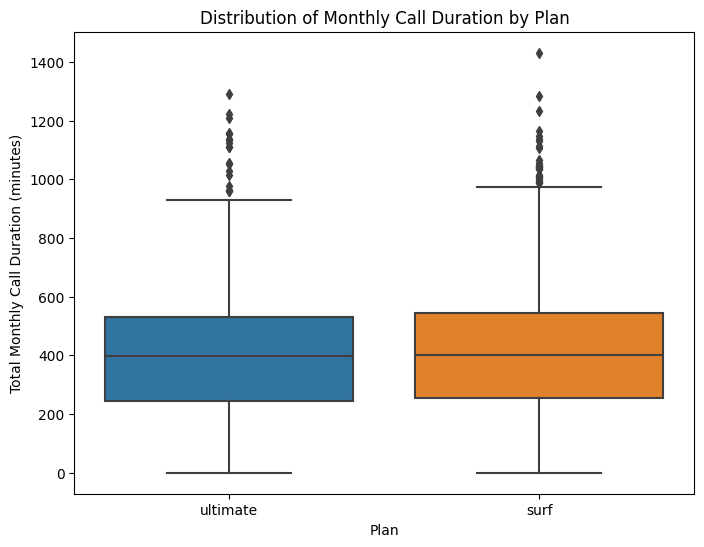

In [26]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Create a boxplot to visualize the distribution of monthly call duration
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='duration', data=total_minutes_used)
plt.xlabel('Plan')
plt.ylabel('Total Monthly Call Duration (minutes)')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.show()

The distribution of monthly call duration is also nearly identical, with a mean of approximately 400 minutes for both plans

### Messages

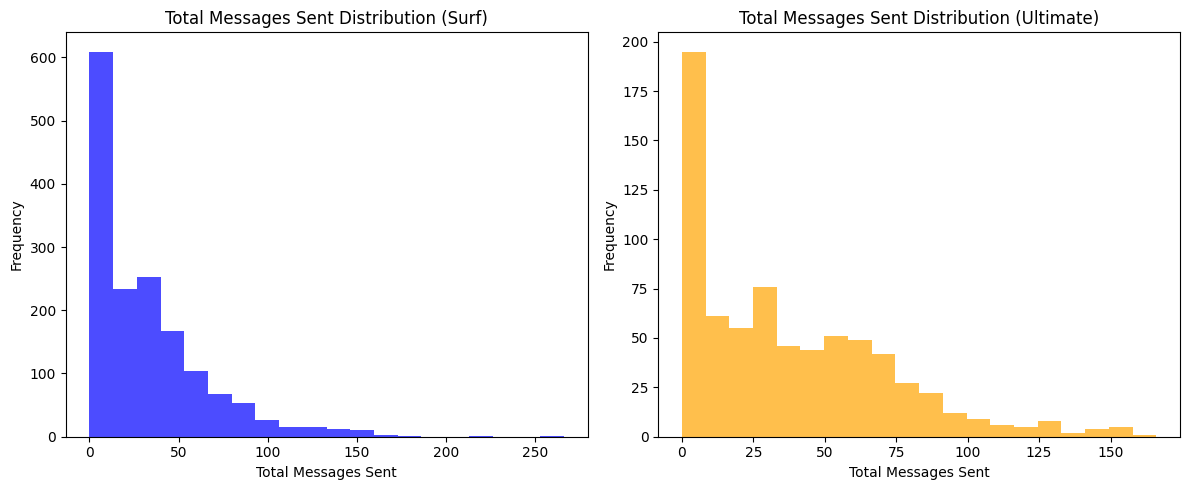

In [27]:
# Compare the number of messages users of each plan tend to send each month
# Calculate total messages sent per user per month
total_messages_sent = merged_df.groupby(['user_id', 'month', 'plan'])['messages_count'].sum().reset_index()

# Create separate DataFrames for each plan
surf_messages = total_messages_sent[total_messages_sent['plan'] == 'surf']['messages_count']
ultimate_messages = total_messages_sent[total_messages_sent['plan'] == 'ultimate']['messages_count']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histograms
axes[0].hist(surf_messages, bins=20, color='blue', alpha=0.7)
axes[0].set_xlabel('Total Messages Sent')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Total Messages Sent Distribution (Surf)')

axes[1].hist(ultimate_messages, bins=20, color='orange', alpha=0.7)
axes[1].set_xlabel('Total Messages Sent')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Total Messages Sent Distribution (Ultimate)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [28]:
messages_stats = total_messages_sent.groupby('plan')['messages_count'].agg(['mean', 'var']).reset_index()
messages_stats

,plan,mean,var
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


Observations:

Surf Plan: The histogram for the Surf plan shows a right-skewed distribution. This indicates that a majority of Surf users send a relatively small number of messages, while a smaller portion sends significantly more. The distribution has a long tail towards the right, suggesting the presence of some users who send a very high number of messages.

Ultimate Plan: The histogram for the Ultimate plan also exhibits a right-skewed distribution, but it is even more skewed than the Surf plan. This implies that a larger proportion of Ultimate users send a smaller number of messages compared to Surf users. However, there is still a noticeable tail towards the right, indicating the presence of users who send a large number of messages.

### Internet

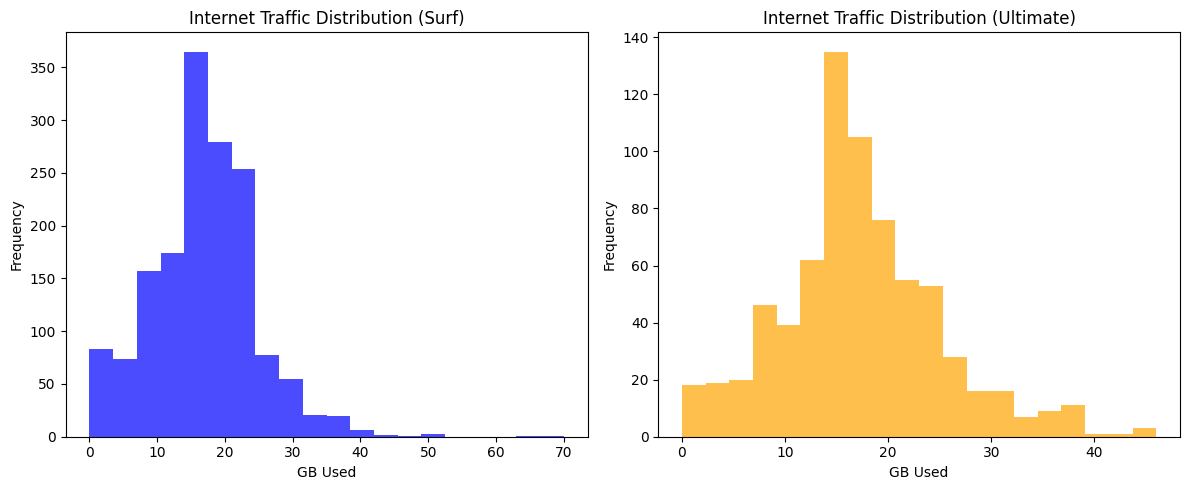

In [29]:
# Compare the amount of internet traffic consumed by users per plan
# Create separate DataFrames for each plan
surf_internet = merged_df[merged_df['plan'] == 'surf']['gb_used']
ultimate_internet = merged_df[merged_df['plan'] == 'ultimate']['gb_used']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histograms
axes[0].hist(surf_internet, bins=20, color='blue', alpha=0.7)
axes[0].set_xlabel('GB Used')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Internet Traffic Distribution (Surf)')

axes[1].hist(ultimate_internet, bins=20, color='orange', alpha=0.7)
axes[1].set_xlabel('GB Used')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Internet Traffic Distribution (Ultimate)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Interpretation:

Variability: Both histograms confirm the high variability in data usage. There's a wide range of data consumption behaviors among users within each plan.

Plan Differences: The Ultimate plan, with its higher data allowance (30GB), shows a distribution shifted towards higher usage compared to the Surf plan (15GB). However, a significant portion of Ultimate users still consume a relatively small amount of data.

Overage Potential: The right-skewed distributions in both plans indicate that a portion of users in each plan could be exceeding their included data, potentially leading to overage charges.

## Revenue

       plan       mean        std
0      surf  60.322740  55.261366
1  ultimate  72.313889  11.395108


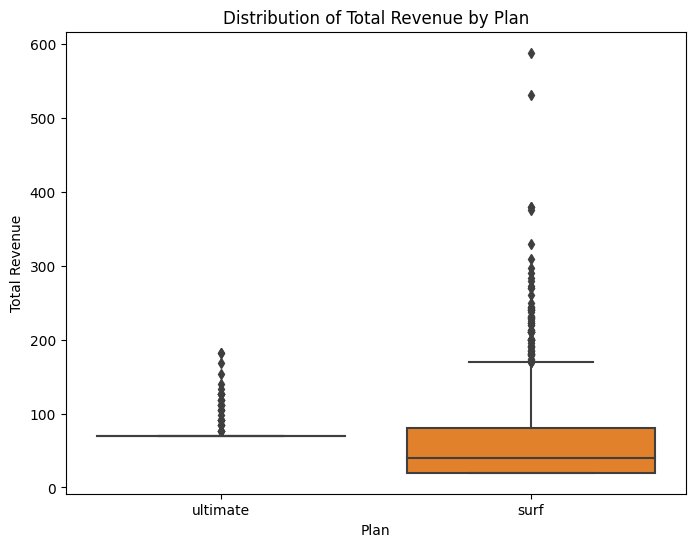

In [30]:
# Calculate mean and standard deviation of revenue for each plan
plan_revenue_stats = merged_df.groupby('plan')['total_revenue'].agg(['mean', 'std']).reset_index()

print(plan_revenue_stats)

# Create a boxplot to visualize revenue distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='total_revenue', data=merged_df)
plt.xlabel('Plan')
plt.ylabel('Total Revenue')
plt.title('Distribution of Total Revenue by Plan')
plt.show()

Median Revenue: The median total revenue for the "Surf" plan is significantly higher than that of the "Ultimate" plan. This suggests that, on average, the company generates more revenue from users on the Surf plan.

Distribution: Both plans exhibit right-skewed distributions, with a longer tail towards higher revenue values. This indicates that there are a smaller number of users who generate significantly more revenue compared to the majority.

Outliers: The presence of outliers in both plans suggests that there are a few users who generate significantly more revenue than the typical user.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [31]:
# Separate revenue data for each plan
from scipy import stats as st

ultimate_revenue = merged_df[merged_df['plan'] == 'ultimate'].groupby('user_id')['total_revenue'].mean()
surf_revenue = merged_df[merged_df['plan'] == 'surf'].groupby('user_id')['total_revenue'].mean()

# Perform the t-test 
alpha = 0.05
results = st.ttest_ind(ultimate_revenue, surf_revenue, nan_policy='omit', equal_var=False)  
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value: 2.4465379691382013e-08
We reject the null hypothesis


The t-test was unable to provide conclusive evidence regarding the difference in average revenue between the Ultimate and Surf plans.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [32]:
# Test the hypotheses

# Create DataFrames for NY-NJ and other regions
ny_nj_revenue = merged_df[merged_df['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])].groupby('user_id')["total_revenue"].mean()
other_regions_revenue = merged_df[~merged_df['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])].groupby('user_id')['total_revenue'].mean()

# Perform the t-test 
alpha = 0.05
results = st.ttest_ind(ny_nj_revenue, other_regions_revenue, nan_policy='omit', equal_var=False)  
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


p-value: 0.4308514126901387
We fail to reject the null hypothesis


the t-test was unable to provide conclusive evidence regarding the difference in average revenue between users in the NY-NJ area and other regions.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

1. Revenue Distribution:

The "Surf" plan appears to generate higher median revenue compared to the "Ultimate" plan. This suggests that a portion of Surf users exceed their included minutes, messages, or data, resulting in overage charges that contribute significantly to revenue.
Both plans exhibit right-skewed revenue distributions, indicating that a smaller number of users generate a disproportionately large share of the revenue.

2. User Behavior:

Users in both plans exhibit high variability in their usage patterns. Some users consume very little, while others use a significant amount of minutes, messages, or data.
The histograms reveal that a substantial portion of users in both plans might be exceeding their included allowances, potentially leading to overage charges.

3. Plan Performance:

The Ultimate plan, despite its higher price, might not be fully utilized by all users. A significant portion of users on this plan may not be consuming the full amount of minutes, messages, or data included in their plan.

5. Recommendations:

Pricing Optimization: Review and optimize pricing models for both plans to maximize revenue while maintaining user satisfaction.

Targeted Marketing: Segment users based on their usage patterns and revenue generation to offer tailored promotions and plans.
Usage Monitoring and Alerts: Provide users with tools to monitor their usage and receive alerts when they are approaching their plan limits.

Plan Bundles: Consider offering flexible plan bundles that allow users to customize their allowances based on their specific needs.

Overall:

The analysis highlights the importance of understanding user behavior and usage patterns to optimize pricing, improve customer satisfaction, and maximize revenue. By analyzing usage data, segmenting users, and offering flexible plan options, Megaline can improve its service offerings and strengthen its competitive position.

Overall Conclusion for the Hypothesis Testing:

This analysis investigated differences in average revenue between users of the "Ultimate" and "Surf" calling plans, and between users in the NY-NJ area and those in other regions.

Plan Comparison:

The hypothesis test comparing average revenue from "Ultimate" and "Surf" plan users yielded a p-value of 2.45e-08. This extremely small p-value provides very strong statistical evidence to reject the null hypothesis that the average revenues for the two plans are equal. We can confidently conclude that there is a statistically significant difference in average revenue between the "Ultimate" and "Surf" plans. 

Regional Comparison:

The hypothesis test comparing average revenue from users in the NY-NJ area and those in other regions resulted in a p-value of 0.431. Since this p-value is much greater than our chosen significance level of 0.05, we fail to reject the null hypothesis. This means we do not have sufficient statistical evidence to conclude that there is a difference in average revenue between users in the NY-NJ area and those in other regions.